The file Daily_clim_data_Auckland.csv in the data directory (./data/Daily_clim_data_Auckland.csv) contains daily values for rainfall, minimum and maximum temperatures for Auckland from 1972 to now.

1.- Read the data in a Pandas DataFrame, correctly setting up the index as a datetime index
2.- calculate monthly means for the temperature data, monthly totals for rainfall
3.- calculate and plot a climatology over the period 1981 - 2000 for all parameters
4.- calculate the anomalies WRT this climatology for all parameters
5.- plots the time-series of minimum and maximum temperature
6.- dig into the Scipy documentation to find how to calculate the linear trend over the period for the temperature data
7.- calculate and plot the trend

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt

mpl.rc('savefig', dpi=200)
plt.style.use('ggplot')
plt.rcParams['xtick.minor.size'] = 0
plt.rcParams['ytick.minor.size'] = 0

In [2]:
dailyclim= pd.read_csv('Daily_clim_data_Auckland.csv')

In [3]:
dailyclim.describe()

,rain,tmax,tmin
count,15341.000000,15341.000000,15341.000000
mean,11.549886,12.558738,6.421472
std,19.577677,4.507271,3.665703
min,0.000000,-2.000000,-7.800000
25%,0.000000,9.400000,3.800000
50%,2.400000,12.300000,6.500000
75%,15.700000,15.600000,9.000000
max,258.600000,30.200000,19.200000


In [4]:
dailyclim.shape

(15341, 4)

In [5]:
dailyclim.head()

,Unnamed: 0,rain,tmax,tmin
0,1972-01-01 12:00:00,31.6,16.8,13.5
1,1972-01-02 12:00:00,28.3,20.6,8.8
2,1972-01-03 12:00:00,10.7,15.8,8.3
3,1972-01-04 12:00:00,11.3,12.9,7.7
4,1972-01-05 12:00:00,0.0,13.2,7.0


In [6]:
dailyclim.tail()

,Unnamed: 0,rain,tmax,tmin
15336,2013-12-27 13:00:00,1.6,20.5,10.9
15337,2013-12-28 13:00:00,1.2,20.9,11.7
15338,2013-12-29 13:00:00,25.3,20.0,12.2
15339,2013-12-30 13:00:00,27.7,12.1,10.7
15340,2013-12-31 13:00:00,42.5,10.4,7.1


In [7]:
dailyclim.rename(columns={'Unnamed: 0' : 'year_month_hour'}, inplace=True)

In [8]:
dailyclim[:3]

,year_month_hour,rain,tmax,tmin
0,1972-01-01 12:00:00,31.6,16.8,13.5
1,1972-01-02 12:00:00,28.3,20.6,8.8
2,1972-01-03 12:00:00,10.7,15.8,8.3


In [9]:
dailyclim.dtypes

year_month_hour     object
rain               float64
tmax               float64
tmin               float64
dtype: object

In [33]:
#dailyclim.index = pd.date_range(start='1972-01-01', periods=len(dailyclim)) cambiar el índice por fecha

In [48]:
#dailyclim['year_month_hour']=pd.to_datetime(dailyclim.year_month_hour) cambiar el formato de la fecha

In [ ]:
#dailyclim.drop('columna',axis=1, inplace=True) eliminar keys

In [10]:
dailyclim['fecha'] = pd.to_datetime(dailyclim['year_month_hour']).dt.date
dailyclim['hora'] = pd.to_datetime(dailyclim['year_month_hour']).dt.time #separar hora y fecha

In [11]:
dailyclim[:3]

,year_month_hour,rain,tmax,tmin,fecha,hora
0,1972-01-01 12:00:00,31.6,16.8,13.5,1972-01-01,12:00:00
1,1972-01-02 12:00:00,28.3,20.6,8.8,1972-01-02,12:00:00
2,1972-01-03 12:00:00,10.7,15.8,8.3,1972-01-03,12:00:00


In [12]:
dailyclim['y'] = pd.DatetimeIndex(dailyclim['fecha']).year
dailyclim['m'] = pd.DatetimeIndex(dailyclim['fecha']).month #separar mes y año

In [13]:
dailyclim.head()

,year_month_hour,rain,tmax,tmin,fecha,hora,y,m
0,1972-01-01 12:00:00,31.6,16.8,13.5,1972-01-01,12:00:00,1972,1
1,1972-01-02 12:00:00,28.3,20.6,8.8,1972-01-02,12:00:00,1972,1
2,1972-01-03 12:00:00,10.7,15.8,8.3,1972-01-03,12:00:00,1972,1
3,1972-01-04 12:00:00,11.3,12.9,7.7,1972-01-04,12:00:00,1972,1
4,1972-01-05 12:00:00,0.0,13.2,7.0,1972-01-05,12:00:00,1972,1


In [14]:
dailyclim=dailyclim[['y', 'm','rain','tmax','tmin','fecha']] #ordenar DtF
dailyclim[30:40]

,y,m,rain,tmax,tmin,fecha
30,1972,1,2.2,11.5,5.3,1972-01-31
31,1972,2,0.0,14.5,3.4,1972-02-01
32,1972,2,0.0,19.3,4.9,1972-02-02
33,1972,2,0.0,19.2,8.8,1972-02-03
34,1972,2,7.4,13.9,11.6,1972-02-04
35,1972,2,0.0,18.6,7.9,1972-02-05
36,1972,2,0.0,22.1,8.3,1972-02-06
37,1972,2,0.0,20.8,9.1,1972-02-07
38,1972,2,30.1,11.4,12.3,1972-02-08
39,1972,2,0.0,16.1,4.8,1972-02-09


Temperatura máxima, mínima y lluvia total por mes

In [15]:
groups = dailyclim.groupby('m')

In [63]:
for m, group in groups:
    print(m)
    print(group.head())

1
      y  m  rain  tmax  tmin       fecha
0  1972  1  31.6  16.8  13.5  1972-01-01
1  1972  1  28.3  20.6   8.8  1972-01-02
2  1972  1  10.7  15.8   8.3  1972-01-03
3  1972  1  11.3  12.9   7.7  1972-01-04
4  1972  1   0.0  13.2   7.0  1972-01-05
2
       y  m  rain  tmax  tmin       fecha
31  1972  2   0.0  14.5   3.4  1972-02-01
32  1972  2   0.0  19.3   4.9  1972-02-02
33  1972  2   0.0  19.2   8.8  1972-02-03
34  1972  2   7.4  13.9  11.6  1972-02-04
35  1972  2   0.0  18.6   7.9  1972-02-05
3
       y  m   rain  tmax  tmin       fecha
60  1972  3    0.0  18.9  12.6  1972-03-01
61  1972  3    0.0  21.7  14.0  1972-03-02
62  1972  3   17.4  19.4  12.8  1972-03-03
63  1972  3  118.9  15.7  13.7  1972-03-04
64  1972  3    0.0  13.3   6.0  1972-03-05
4
       y  m  rain  tmax  tmin       fecha
91  1972  4   7.0  12.4   9.8  1972-04-01
92  1972  4   0.0  14.6   8.1  1972-04-02
93  1972  4   2.2  14.5   7.9  1972-04-03
94  1972  4   0.0  15.5   9.7  1972-04-04
95  1972  4  18.0  12.4  1

In [16]:
clim_temp = groups.mean()
clim_temp

,y,rain,tmax,tmin
m,,,,
1,1992.500000,13.907757,17.022350,9.626190
2,1992.495366,10.937405,17.337152,9.950716
3,1992.500000,11.724808,15.704224,9.054762
4,1992.500000,11.964286,13.031032,7.487540
5,1992.500000,12.620200,10.321352,5.565975
6,1992.500000,10.442063,8.092698,3.651429
7,1992.500000,9.306221,7.713594,3.240783
8,1992.500000,9.133410,8.815131,3.437711
9,1992.500000,11.718175,10.677302,4.513968


In [17]:
rain=groups.sum()

In [18]:
rain=rain[['y','rain']]
print rain

          y     rain
m                   
1   2594235  18107.9
2   2365092  12982.7
3   2594235  15265.7
4   2510550  15075.0
5   2594235  16431.5
6   2510550  13157.0
7   2594235  12116.7
8   2594235  11891.7
9   2510550  14764.9
10  2594235  16989.3
11  2510550  14102.2
12  2594235  16302.2


Climatología del periodo 1981-2000

In [19]:
clim_temp.query('y >= 1981 & y <= 2000')[:] #seleccionar años específicos

,y,rain,tmax,tmin
m,,,,
1,1992.500000,13.907757,17.022350,9.626190
2,1992.495366,10.937405,17.337152,9.950716
3,1992.500000,11.724808,15.704224,9.054762
4,1992.500000,11.964286,13.031032,7.487540
5,1992.500000,12.620200,10.321352,5.565975
6,1992.500000,10.442063,8.092698,3.651429
7,1992.500000,9.306221,7.713594,3.240783
8,1992.500000,9.133410,8.815131,3.437711
9,1992.500000,11.718175,10.677302,4.513968


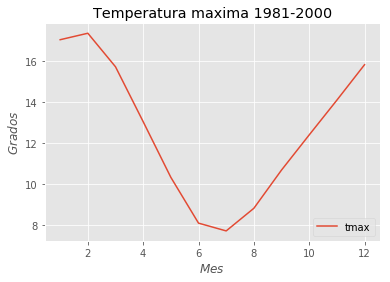

In [20]:
clim_temp['tmax'].plot()
plt.xlabel("$Mes$")
plt.ylabel("$Grados$")
plt.title("Temperatura maxima 1981-2000")
plt.legend(loc=4)

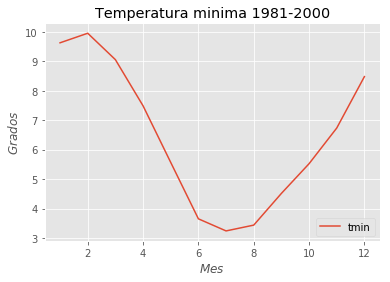

In [21]:
clim_temp['tmin'].plot()
plt.xlabel("$Mes$")
plt.ylabel("$Grados$")
plt.title("Temperatura minima 1981-2000")
plt.legend(loc=4)

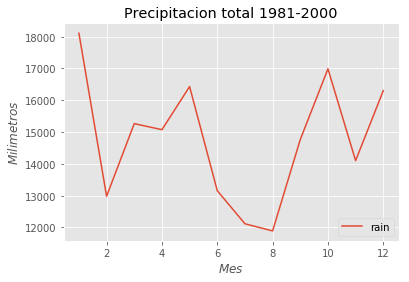

In [22]:
rain['rain'].plot()
plt.xlabel("$Mes$")
plt.ylabel("$Milimetros$")
plt.title("Precipitacion total 1981-2000")
plt.legend(loc=4)